# Trying Something New

In [119]:
from functions import *

In [120]:
# Setting Variables
crypto_currency = "BTC" # Can be changed into any Crypto
base_currency = "USD" # Can be changed into any Currency

# Start date and end date can be changed to any time frame
start = dt.datetime(2016, 1, 1)
end = dt.datetime.now()

# Days to look at, can be changed to any amount of days withing the timeframe set above
prediction_days = 30

In [121]:
# Getting the data from data function
data = get_data(crypto_currency, base_currency, start, end)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,436.246002,427.515015,430.721008,434.334015,36278900.0,434.334015
2016-01-02,436.062012,431.869995,434.622009,433.437988,30096600.0,433.437988
2016-01-03,433.743011,424.705994,433.578003,430.010986,39633800.0,430.010986
2016-01-04,434.516998,429.084015,430.061005,433.091003,38477500.0,433.091003
2016-01-05,434.182007,429.675995,433.069000,431.959991,34522600.0,431.959991


In [122]:
# Setting what we want to calcualte
data = data['Close']

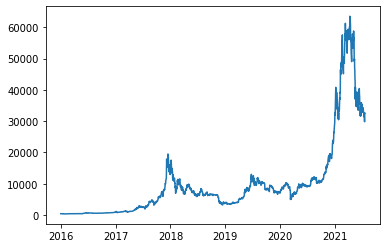

In [123]:
plt.plot(data)

In [124]:
# Model Training Data
X_train, y_train = train_data_sets(data, prediction_days)

In [125]:
# Model Building
batch = 32
epochs = 50

model_build(X_train, y_train, batch, epochs)

Epoch 1/50
63/63 [==============================] - 4s 15ms/step - loss: 0.0049
Epoch 2/50
63/63 [==============================] - 1s 17ms/step - loss: 0.0021
Epoch 3/50
63/63 [==============================] - 1s 17ms/step - loss: 0.0016
Epoch 4/50
63/63 [==============================] - 1s 15ms/step - loss: 0.0019
Epoch 5/50
63/63 [==============================] - 1s 16ms/step - loss: 0.0019
Epoch 6/50
63/63 [==============================] - 1s 14ms/step - loss: 0.0016
Epoch 7/50
63/63 [==============================] - 1s 16ms/step - loss: 0.0018
Epoch 8/50
63/63 [==============================] - 1s 16ms/step - loss: 0.0012
Epoch 9/50
63/63 [==============================] - 1s 16ms/step - loss: 0.0011
Epoch 10/50
63/63 [==============================] - 1s 16ms/step - loss: 0.0013
Epoch 11/50
63/63 [==============================] - 1s 16ms/step - loss: 0.0014 ETA: 1s - 
Epoch 12/50
63/63 [==============================] - 1s 16ms/step - loss: 0.0012
Epoch 13/50
63/63 [=======

In [126]:
data = get_data(crypto_currency, base_currency, start, end)

In [127]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = get_data(crypto_currency, base_currency, test_start, test_end)
actual_prices = test_data['Close'].values

#total_dataset = pd.concat(data['Close'], test_data['Close'])

In [128]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis = 0)

In [129]:
scaler = MinMaxScaler()

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [130]:
X_test= []

for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [131]:
prediction_prices = model.predict(X_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

<function matplotlib.pyplot.show(close=None, block=None)>

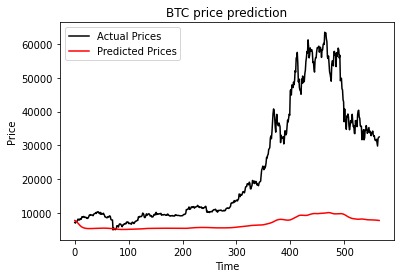

In [132]:
plt.plot(actual_prices, color='black', label="Actual Prices")
plt.plot(prediction_prices, color='red', label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show

In [133]:
actual_prices

array([ 7200.17431641,  6985.47021484,  7344.88427734,  7410.65673828,
        7411.31738281,  7769.21923828,  8163.69238281,  8079.86279297,
        7879.07128906,  8166.55419922,  8037.53759766,  8192.49414062,
        8144.19433594,  8827.76464844,  8807.01074219,  8723.78613281,
        8929.03808594,  8942.80859375,  8706.24511719,  8657.64257812,
        8745.89453125,  8680.87597656,  8406.515625  ,  8445.43457031,
        8367.84765625,  8596.83007812,  8909.81933594,  9358.58984375,
        9316.62988281,  9508.99316406,  9350.52929688,  9392.875     ,
        9344.36523438,  9293.52148438,  9180.96289062,  9613.42382812,
        9729.80175781,  9795.94335938,  9865.11914062, 10116.67382812,
        9856.61132812, 10208.23632812, 10326.0546875 , 10214.37988281,
       10312.11621094,  9889.42480469,  9934.43359375,  9690.14257812,
       10141.99609375,  9633.38671875,  9608.47558594,  9686.44140625,
        9663.18164062,  9924.515625  ,  9650.17480469,  9341.70507812,
      